<a href="https://colab.research.google.com/github/anmay-kaushik/mlearning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10

In [12]:
#Load CIFAR-10 Dataset
(x_train,y_train),(x_test,_)=cifar10.load_data()
print("training shape",x_train.shape)
print("testing shape",x_test.shape)

training shape (50000, 32, 32, 3)
testing shape (10000, 32, 32, 3)


In [13]:
#Normalize Pixel Values
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
#build CNN Model
model = models.Sequential([

layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
layers.MaxPool2D((2,2)),


layers.Conv2D(64,(3,3),activation ='relu'),
layers.MaxPooling2D((2,2)),


layers.Conv2D(64,(3,3),activation='relu'),
layers.Flatten(),

layers.Dense(64,activation='relu'),
layers.Dense(10,activation='softmax')#10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
#Train the model
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 0.3308 - loss: 1.8016 - val_accuracy: 0.5260 - val_loss: 1.3173
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.5480 - loss: 1.2680 - val_accuracy: 0.6000 - val_loss: 1.1526
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.6050 - loss: 1.1058 - val_accuracy: 0.6292 - val_loss: 1.0730
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.6496 - loss: 0.9971 - val_accuracy: 0.6728 - val_loss: 0.9390
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.6791 - loss: 0.9143 - val_accuracy: 0.6178 - val_loss: 1.1465
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.6956 - loss: 0.8752 - val_accuracy: 0.7100 - val_loss: 0.8567
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.7223 - loss: 0.7949 - val_accuracy: 0.6998 - val_loss: 0.8569
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 85s 79ms/step - accuracy: 0.7379 - loss: 0.7510 - 

In [21]:
#Predict on Test Set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [24]:
#Create Submission CSV
submission = pd.DataFrame({'id':np.arange(len(predicted_classes)),'Category':predicted_classes})
submission.to_csv('submission.csv',index=False)

In [25]:
#show some predictions
print(submission.head())

   id  Category
0   0         3
1   1         8
2   2         8
3   3         0
4   4         6


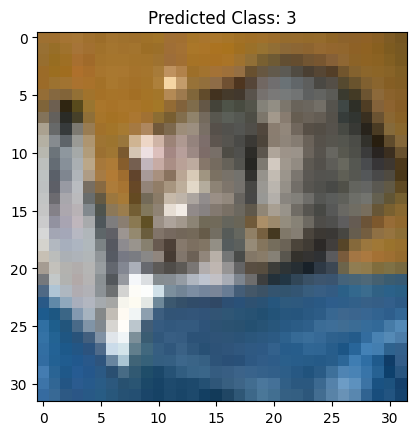

In [26]:
#optional:Visualize one example
plt.imshow(x_test[0])
plt.title(f"Predicted Class: {predicted_classes[0]}")
plt.show()

In [27]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>